In [1]:
import VASPsol as vs
import os
import shutil as sh
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import rc
rc('animation', html='html5')
%matplotlib inline

In [3]:
from dask.distributed import Client, LocalCluster, progress
cluster = LocalCluster(n_workers=16, threads_per_worker=1)
client = Client(cluster)
client

2023-03-04 16:03:20,653 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-cq1sjdy6', purging
2023-03-04 16:03:20,683 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-p8bs_m4z', purging
2023-03-04 16:03:20,684 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-iiao7ae0', purging
2023-03-04 16:03:20,703 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-hz6_g_at', purging
2023-03-04 16:03:20,706 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-5ogdq5vn', purging
2023-03-04 16:03:20,706 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-7el6cf79', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 16
Total threads: 16,Total memory: 125.39 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46116,Workers: 16
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 125.39 GiB
Comm: tcp://127.0.0.1:41866,Total threads: 1
Dashboard: http://127.0.0.1:45320/status,Memory: 7.84 GiB
Nanny: tcp://127.0.0.1:35506,


In [18]:
def load_rhob(directory):
    try:
        return vs.Chgcar.from_file(directory + '/RHOB').linear_slice([0.5, 0.5, 0], [0.5, 0.5, 1])
    except:
        return None

In [19]:
# lets get the grid search result directories that have "VAC" directories in them
dir = '../shape_animation_data/0008noc/'
data = vs.data(dir)
data.ml_df

/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/shape_animation_data/0008noc/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.0025_SIGMA_K_0.4736842105263158_TAU_0.000525_LRHOB_TRUE
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/shape_animation_data/0008noc/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.0025_SIGMA_K_1.1578947368421053_TAU_0.000525_LRHOB_TRUE
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/shape_animation_data/0008noc/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.0025_SIGMA_K_0.5421052631578948_TAU_0.000525_LRHOB_TRUE
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/shape_animation_data/0008noc/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.0025_SIGMA_K_1.5_TAU_0.000525_LRHOB_TRUE
/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_Benchmarks/VaspPysol/shape_animation_data/0008noc/Solvent_water_epsilon_78.4_Ionic_0_calc_linear_NC_K_0.0025_SIGMA_K_0.26842105263157895_TAU_0.00

,Solvent,FileHandle,directory,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,SoluteName,...,OP,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac
0,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.473684,0.000525,0.09172,-139.56779,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,0.774937,0.033605,0.268144
1,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,1.157895,0.000525,-0.56852,-140.22803,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,16.000071,0.693845,5.536357
2,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.542105,0.000525,0.08194,-139.57757,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,1.000464,0.043385,0.346181
3,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,1.500000,0.000525,-6.97994,-146.63945,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,163.847416,7.105265,56.694608
4,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.268421,0.000525,0.10956,-139.54995,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,0.363546,0.015765,0.125795
5,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,1.294737,0.000525,-1.42312,-141.08263,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,35.707147,1.548445,12.355414
6,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.678947,0.000525,0.05107,-139.60844,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,1.712326,0.074255,0.592500
7,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.815789,0.000525,-0.00714,-139.66665,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,3.054648,0.132465,1.056972
8,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,1.021053,0.000525,-0.21817,-139.87768,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,7.921000,0.343495,2.740831
9,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.610526,0.000525,0.06884,-139.59067,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,0.0,243.846,1.302550,0.056485,0.450709


In [20]:
# load rhob and save it on the dataframe
import dask.dataframe as dd
ddf = dd.from_pandas(data.ml_df, npartitions=16)
ddf['rhob'] = ddf['directory'].apply(load_rhob)
data.ml_df = ddf.compute()
data.ml_df

/home/ericfonseca/miniconda3/envs/venv/lib/python3.10/site-packages/dask/dataframe/core.py:4134: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('directory', 'object'))

  warnings.warn(meta_warning(meta))


,Solvent,FileHandle,directory,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,SoluteName,...,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac,rhob
0,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.473684,0.000525,0.09172,-139.56779,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,0.774937,0.033605,0.268144,"[6.798600399825005e-05, 5.604290616611875e-05,..."
1,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,1.157895,0.000525,-0.56852,-140.22803,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,16.000071,0.693845,5.536357,"[-9.53081057717498e-06, -7.852511821542155e-06..."
2,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.542105,0.000525,0.08194,-139.57757,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,1.000464,0.043385,0.346181,"[-3.8311508776e-05, -3.3929304137250005e-05, -..."
3,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,1.500000,0.000525,-6.97994,-146.63945,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,163.847416,7.105265,56.694608,"[-2.7660546784749977e-05, -2.9305365189070686e..."
4,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.268421,0.000525,0.10956,-139.54995,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,0.363546,0.015765,0.125795,"[0.0007400127575325, 0.0006360077342787627, 0...."
5,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,1.294737,0.000525,-1.42312,-141.08263,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,35.707147,1.548445,12.355414,"[-8.422205720824976e-06, -1.0102922207040132e-..."
6,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.678947,0.000525,0.05107,-139.60844,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,1.712326,0.074255,0.592500,"[-1.4595569686999983e-05, -1.463502954575234e-..."
7,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.815789,0.000525,-0.00714,-139.66665,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,3.054648,0.132465,1.056972,"[-7.591651764149981e-06, -8.702161334188873e-0..."
8,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,1.021053,0.000525,-0.21817,-139.87768,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,7.921000,0.343495,2.740831,"[-8.18913122372498e-06, -8.937801087782055e-06..."
9,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.610526,0.000525,0.06884,-139.59067,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,1.302550,0.056485,0.450709,"[1.0183758851875017e-05, 6.6101280301323394e-0..."


In [21]:
data.ml_df = data.ml_df.sort_values(by=['SIGMA_K'])
ani_df = data.ml_df.dropna()
ani_df = ani_df[ani_df['NC_K'] == 0.0025].reset_index(drop=True)
ani_df

,Solvent,FileHandle,directory,NC_K,SIGMA_K,TAU,Solvation_Energy,Total_Energy,No.,SoluteName,...,S,HS,OS,SP,SS,TotalArea,error,error_ev,error_frac,rhob
0,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.200000,0.000525,0.12992,-139.52959,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,-0.105955,-0.004595,-0.036663,"[-0.0010827366441500004, -0.000947772076607828..."
1,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.268421,0.000525,0.10956,-139.54995,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,0.363546,0.015765,0.125795,"[0.0007400127575325, 0.0006360077342787627, 0...."
2,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.336842,0.000525,0.10492,-139.55459,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,0.470545,0.020405,0.162818,"[-0.00019894568486499988, -0.00017316743629560..."
3,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.405263,0.000525,0.09935,-139.56016,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,0.598989,0.025975,0.207263,"[-5.8692490352250096e-05, -5.306146834587383e-..."
4,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.473684,0.000525,0.09172,-139.56779,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,0.774937,0.033605,0.268144,"[6.798600399825005e-05, 5.604290616611875e-05,..."
5,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.542105,0.000525,0.08194,-139.57757,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,1.000464,0.043385,0.346181,"[-3.8311508776e-05, -3.3929304137250005e-05, -..."
6,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.610526,0.000525,0.06884,-139.59067,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,1.302550,0.056485,0.450709,"[1.0183758851875017e-05, 6.6101280301323394e-0..."
7,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.678947,0.000525,0.05107,-139.60844,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,1.712326,0.074255,0.592500,"[-1.4595569686999983e-05, -1.463502954575234e-..."
8,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.747368,0.000525,0.02669,-139.63282,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,2.274529,0.098635,0.787034,"[-2.8272560159999836e-06, -4.548763669434835e-..."
9,water,0008noc,/blue/hennig/ericfonseca/NASA/VASPsol/Truhlar_...,0.0025,0.815789,0.000525,-0.00714,-139.66665,2100,n-octane,...,0.0,0.0,0.0,0.0,0.0,243.846,3.054648,0.132465,1.056972,"[-7.591651764149981e-06, -8.702161334188873e-0..."


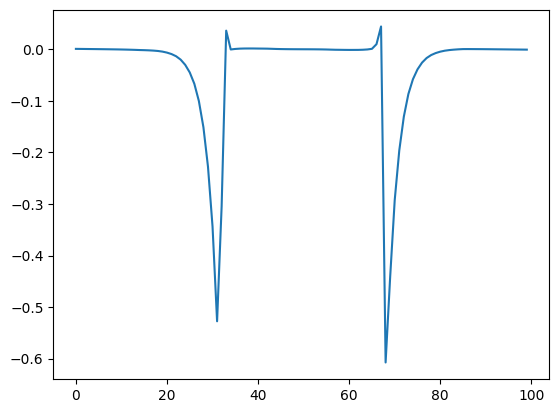

In [27]:
# plot the first rhob
plt.plot(ani_df['rhob'][1])

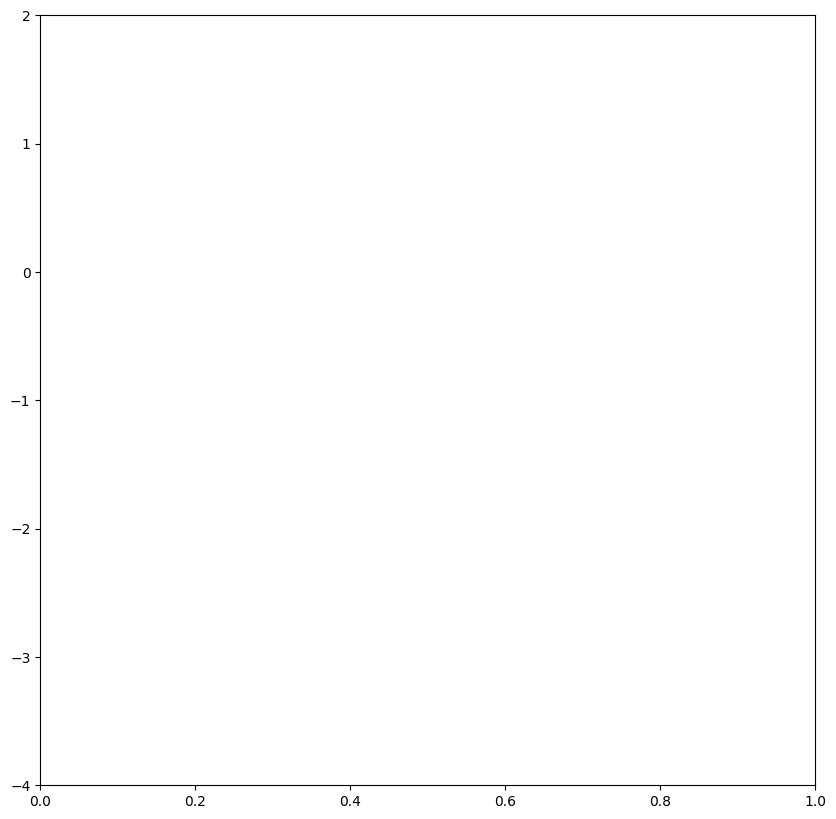

In [33]:
# lets make an animation of the rhob as SIGMA_K changes. make this ready for the APS presentation
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(0, 1), ylim=(-4, 2))
line, = ax.plot([], [], lw=2)
def init():
    line.set_data([], [])
    return line,
def animate(i):
    
    y = ani_df['rhob'][i]
    x = np.linspace(0, 1, len(y))
    line.set_data(x, y)
    return line,
anim = animation.FuncAnimation(fig, animate, init_func=init,
                                 frames=len(ani_df), interval=200)
# save as gif
anim.save('shape_animation.gif', writer='imagemagick', fps=5)